Error:  30.916422043639656
Error:  30.916422043639656
Error:  27.960117381701707
Error:  25.384979230490796
Error:  23.141862468964387
Error:  21.18795842657416
Error:  19.485977902814724
Error:  18.003439522882037
Error:  16.712049848092445
Error:  15.587163410806564
Error:  14.60731236891356
Error:  13.753796803587138
Error:  13.010327841366593
Error:  12.362716789739915
Error:  11.798604353550225
Error:  11.30722476446593
Error:  10.87920032205302
Error:  10.506362425376912
Error:  10.181595679617955
Error:  9.898702102559865
Error:  9.65228283940496
Error:  9.437635128506937
Error:  9.250662551668151
Error:  9.087796856176162
Error:  8.945929856595694
Error:  8.822354116697975
Error:  8.714711279474251
Error:  8.620947059139366
Error:  8.539272036172244
Error:  8.468127507187441
Error:  8.406155737901011
Error:  8.35217405148475
Error:  8.305152257798413
Error:  8.264192992749546
Error:  8.228514592567656
Error:  8.197436176157687
Error:  8.170364650837577
Error:  8.146783393470884

Error:  7.9868963917106015
Error:  7.9868950860895955
Error:  7.986893780481678
Error:  7.9868924748868295
Error:  7.986891169305038
Error:  7.986889863736339
Error:  7.986888558180711
Error:  7.986887252638149
Error:  7.986885947108679
Error:  7.986884641592269
Error:  7.986883336088927
Error:  7.986882030598669
Error:  7.986880725121474
Error:  7.98687941965735
Error:  7.986878114206312
Error:  7.9868768087683355
Error:  7.986875503343433
Error:  7.986874197931605
Error:  7.986872892532856
Error:  7.986871587147161
Error:  7.986870281774553
Error:  7.986868976415003
Error:  7.986867671068532
Error:  7.986866365735133
Error:  7.986865060414805
Error:  7.986863755107548
Error:  7.986862449813355
Error:  7.986861144532246
Error:  7.986859839264198
Error:  7.98685853400922
Error:  7.986857228767323
Error:  7.986855923538495
Error:  7.986854618322732
Error:  7.986853313120048
Error:  7.986852007930414
Error:  7.986850702753864
Error:  7.986849397590367
Error:  7.986848092439968
Error:  7.

Error:  7.986330978884135
Error:  7.986329678925024
Error:  7.986328378978925
Error:  7.98632707904583
Error:  7.98632577912576
Error:  7.986324479218714
Error:  7.986323179324693
Error:  7.986321879443676
Error:  7.986320579575684
Error:  7.986319279720686
Error:  7.98631797987871
Error:  7.986316680049783
Error:  7.986315380233852
Error:  7.98631408043094
Error:  7.986312780641031
Error:  7.986311480864133
Error:  7.986310181100267
Error:  7.98630888134942
Error:  7.986307581611574
Error:  7.986306281886751
Error:  7.98630498217494
Error:  7.98630368247615
Error:  7.986302382790358
Error:  7.986301083117601
Error:  7.986299783457856
Error:  7.9862984838111135
Error:  7.986297184177404
Error:  7.986295884556678
Error:  7.98629458494901
Error:  7.986293285354314
Error:  7.986291985772652
Error:  7.986290686204003
Error:  7.986289386648361
Error:  7.98628808710573
Error:  7.986286787576131
Error:  7.986285488059526
Error:  7.986284188555938
Error:  7.986282889065366
Error:  7.9862815895

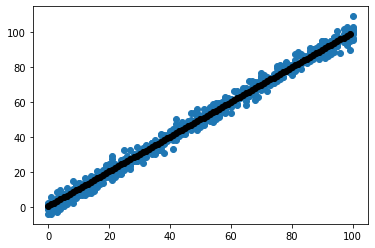

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import math
import random

# Cost function: (1/n) * sum[i=1, n, (pred[i] - y[i])^2]

# grad_a0 = (2 / n) * sum[i=1, n, (pred[i] - y[i])]
# grad_a1 = (2 / n) * sum[i=1, n, (pred[i] - y[i])*x[i]]

train = pd.read_csv("train.csv")

x_train = train['x']
y_train = train['y']

def error_a0(x, y, a0, a1, n):
    return (2/n) * sum([(a0 + a1*m - n) for m, n in zip(x, y) if not math.isnan(n)])

def MNS(x, y, a0, a1, b):
    return (1/b) * sum([(a0 + a1*m - n)**2 for m, n in zip(x, y) if not math.isnan(n)])

def error_a1(x, y, a0, a1, n):
    return (2/n) * sum([(a0 + a1*m - n)*m for m, n in zip(x, y) if not math.isnan(n)])


a0 = random.random()
a1 = random.random()

epochs = 1000
learning_rate = 0.00001
n = len(x_train)

print("Error: ", MNS(x_train, y_train, a0, a1, n))
for i in range(epochs):
    print("Error: ", MNS(x_train, y_train, a0, a1, n))
    a0 = a0 - learning_rate * error_a0(x_train, y_train, a0, a1, n)
    a1 = a1 - learning_rate * error_a1(x_train, y_train, a0, a1, n)

    
y_predict = list()
for i in range(100):
    y_predict.append(a0 + a1*i)

plt.plot(range(100), y_predict, color='black', marker='o', linestyle='solid')

plt.scatter(train.loc[:, "x"], train.loc[:, "y"])

plt.show()